In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
data=pd.read_csv('car details v4.csv')
data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [3]:
data.duplicated().sum()

0

In [4]:
data.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [5]:
data.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [6]:
data.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [7]:
data['Engine'].value_counts()

Engine
1197 cc    231
1248 cc    122
998 cc     121
1497 cc     84
1968 cc     82
          ... 
1948 cc      1
4806 cc      1
3496 cc      1
2609 cc      1
995 cc       1
Name: count, Length: 108, dtype: int64

In [8]:
data['Engine']=data['Engine'].fillna('1197 cc')

In [9]:
data['Max Power'].value_counts()

Max Power
89 bhp @ 4000 rpm     90
82 bhp @ 6000 rpm     62
83 bhp @ 6000 rpm     55
126 bhp @ 4000 rpm    55
74 bhp @ 4000 rpm     50
                      ..
204 bhp @ 3800 rpm     1
157 bhp @ 6500 rpm     1
255 bhp @ 3600 rpm     1
76 bhp @ 6000 rpm      1
329 bhp @ 5250 rpm     1
Name: count, Length: 335, dtype: int64

In [10]:
data['Max Power']=data['Max Power'].fillna('89 bhp @ 4000 rpm')

In [11]:
data['Max Torque'].value_counts()

Max Torque
200 Nm @ 1750 rpm    90
115 Nm @ 4000 rpm    78
114 Nm @ 4000 rpm    66
90 Nm @ 3500 rpm     64
400 Nm @ 1750 rpm    63
                     ..
505 Nm @ 4400 rpm     1
290@1800              1
380 Nm @ 2500 rpm     1
560 Nm @ 6500 rpm     1
480 Nm @ 1600 rpm     1
Name: count, Length: 290, dtype: int64

In [12]:
data['Max Torque']=data['Max Torque'].fillna('200 Nm @ 1750 rpm')

In [13]:
data['Drivetrain'].value_counts()

Drivetrain
FWD    1330
RWD     321
AWD     272
Name: count, dtype: int64

In [14]:
data['Drivetrain']=data['Drivetrain'].fillna('FWD')

In [15]:
imputer1=SimpleImputer()
data['Length']=imputer1.fit_transform(data[['Length']])

imputer2=SimpleImputer()
data['Width']=imputer2.fit_transform(data[['Width']])

imputer3=SimpleImputer()
data['Height']=imputer3.fit_transform(data[['Height']])

imputer4=SimpleImputer()
data['Seating Capacity']=imputer4.fit_transform(data[['Seating Capacity']])

imputer5=SimpleImputer()
data['Fuel Tank Capacity']=imputer5.fit_transform(data[['Fuel Tank Capacity']])

In [16]:
data.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [17]:
data.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [18]:
Make=LabelEncoder()
data['Make']=Make.fit_transform(data['Make'])

Model=LabelEncoder()
data['Model']=Model.fit_transform(data['Model'])

FuelType=LabelEncoder()
data['Fuel Type']=FuelType.fit_transform(data['Fuel Type'])

Transmission=LabelEncoder()
data['Transmission']=Transmission.fit_transform(data['Transmission'])

Location=LabelEncoder()
data['Location']=Location.fit_transform(data['Location'])

Color=LabelEncoder()
data['Color']=Color.fit_transform(data['Color'])

Owner=LabelEncoder()
data['Owner']=Owner.fit_transform(data['Owner'])

SellerType=LabelEncoder()
data['Seller Type']=SellerType.fit_transform(data['Seller Type'])

Engine=LabelEncoder()
data['Engine']=Engine.fit_transform(data['Engine'])

MaxPower=LabelEncoder()
data['Max Power']=MaxPower.fit_transform(data['Max Power'])

MaxTorque=LabelEncoder()
data['Max Torque']=MaxTorque.fit_transform(data['Max Torque'])

Drivetrain=LabelEncoder()
data['Drivetrain']=Drivetrain.fit_transform(data['Drivetrain'])

In [19]:
data.dtypes

Make                    int32
Model                   int32
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type               int32
Transmission            int32
Location                int32
Color                   int32
Owner                   int32
Seller Type             int32
Engine                  int32
Max Power               int32
Max Torque              int32
Drivetrain              int32
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7bf7e8150>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7bf7e9390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7bf743050>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7bf7ea7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7bf7eb050>],
 'means': []}

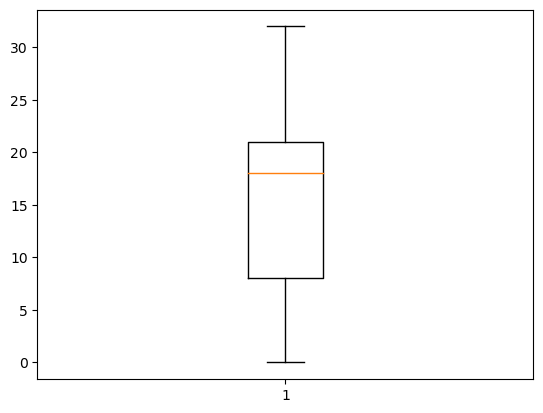

In [20]:
plt.boxplot(data['Make'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7bf8a7e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7bf8b16d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7bf8a7290>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7bf8b2c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7bf8b3610>],
 'means': []}

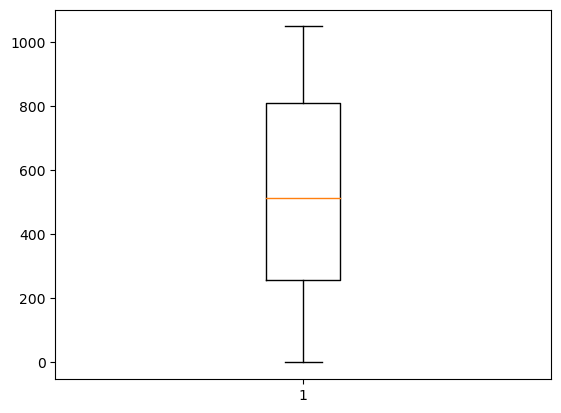

In [21]:
plt.boxplot(data['Model'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7bf914d10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7beece410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7bf914110>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7bf917b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7bf907ed0>],
 'means': []}

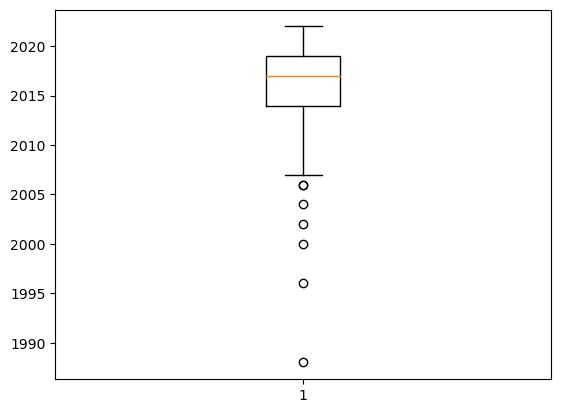

In [22]:
plt.boxplot(data['Year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7b94e2790>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7b94ec190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7bf7801d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7b94ed790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7bf8caa50>],
 'means': []}

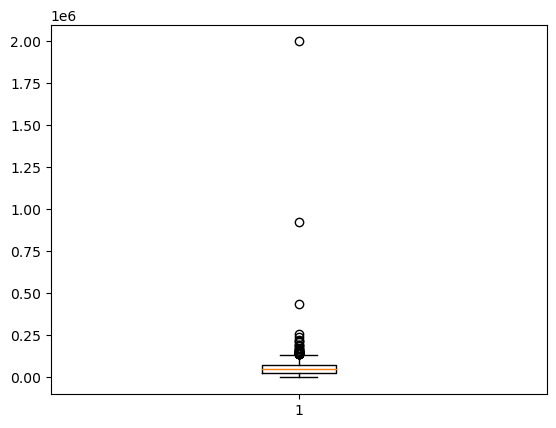

In [23]:
plt.boxplot(data['Kilometer'])

In [24]:
Q1=data.Kilometer.quantile(0.25)
Q3=data.Kilometer.quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

upper_index=np.where(data['Kilometer']>=upper)[0]
lower_index=np.where(data['Kilometer']<=lower)[0]

data.drop(index=upper_index,inplace=True)
data.drop(index=lower_index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7b9555890>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7b9556f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7b951f0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7b9560510>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7b9560f10>],
 'means': []}

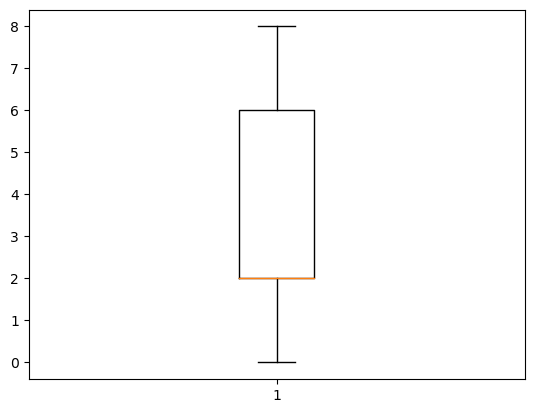

In [25]:
plt.boxplot(data['Fuel Type'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0a62390>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0a80950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7c0a766d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0a81d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0a54610>],
 'means': []}

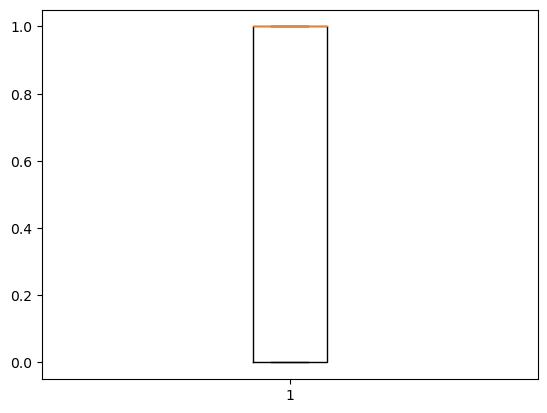

In [26]:
plt.boxplot(data['Transmission'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0ad2c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0adc410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7c0ad2150>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0add9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0ad3710>],
 'means': []}

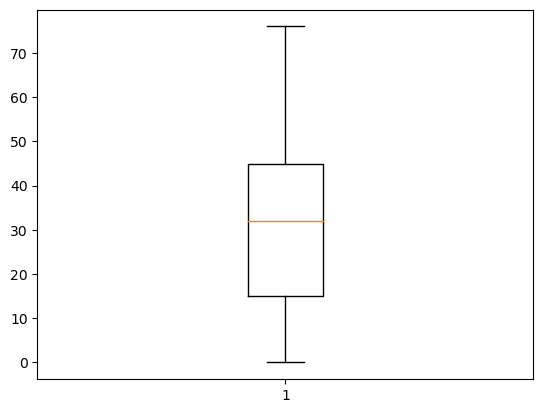

In [27]:
plt.boxplot(data['Location'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7bf94ced0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7bf94e610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7bf94c250>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7bf94f910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0b1f850>],
 'means': []}

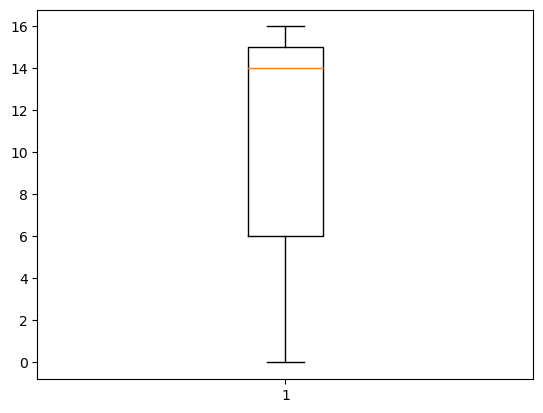

In [28]:
plt.boxplot(data['Color'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7bf9b5b10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7bf9b7190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7bf9b4f50>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7bf9bc750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7bf9bc590>],
 'means': []}

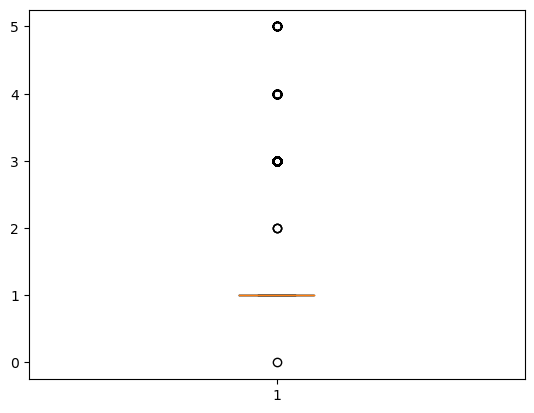

In [29]:
plt.boxplot(data['Owner'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0b30710>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0b31e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7bfa13910>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0b33310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7bf9d3e10>],
 'means': []}

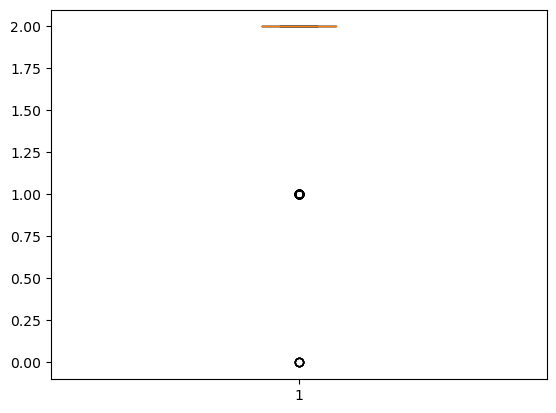

In [30]:
plt.boxplot(data['Seller Type'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0b9d790>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0b9eed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7c0b90890>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0bb0590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7bf8e2c50>],
 'means': []}

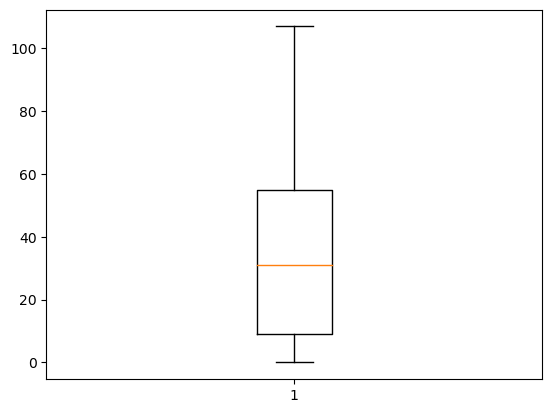

In [31]:
plt.boxplot(data['Engine'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0c00310>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0c019d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7c0bf7690>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0c02f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0c039d0>],
 'means': []}

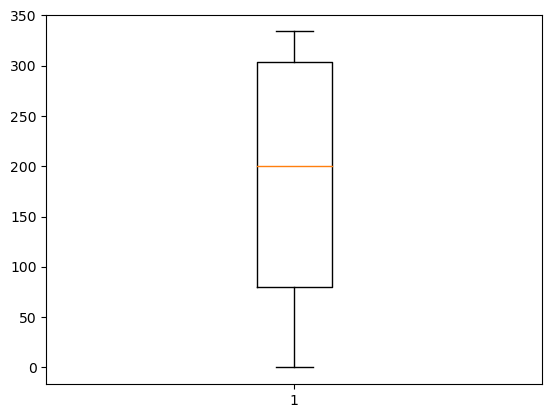

In [32]:
plt.boxplot(data['Max Power'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0db38d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0dc1090>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7c0db2d50>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0dc2590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0dc3010>],
 'means': []}

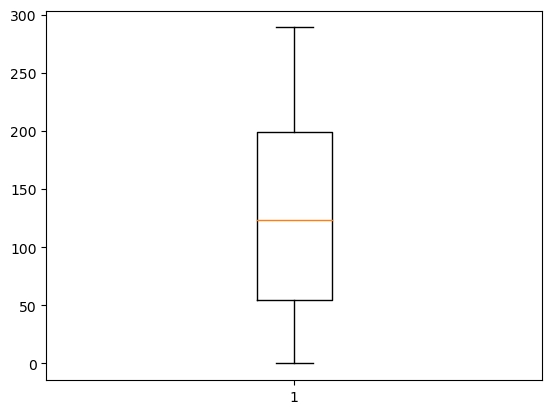

In [33]:
plt.boxplot(data['Max Torque'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0e24290>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0e25890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7c0e17650>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0e26e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0e27990>],
 'means': []}

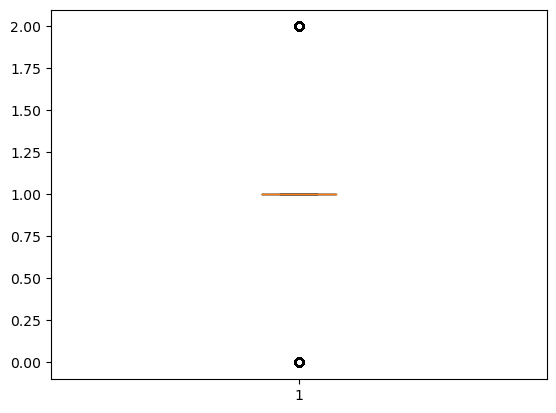

In [34]:
plt.boxplot(data['Drivetrain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0c58c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0c5a290>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7c0c4ffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0c5b6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0c60150>],
 'means': []}

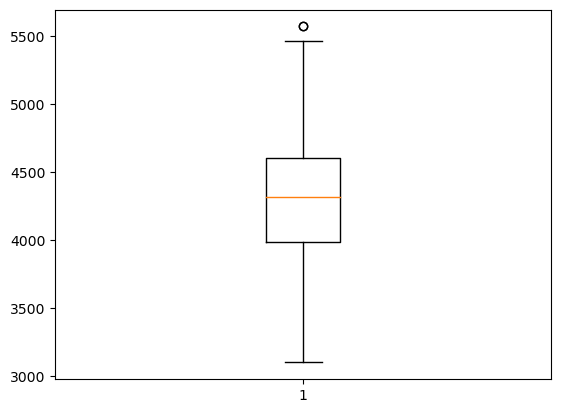

In [35]:
plt.boxplot(data['Length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0cc0390>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0ca6e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7c0cb7690>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0cc2310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0cc2e90>],
 'means': []}

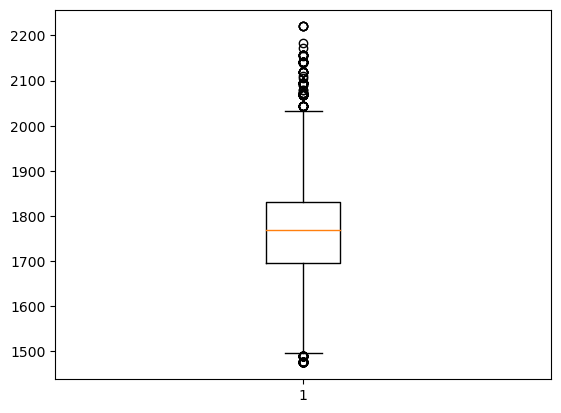

In [36]:
plt.boxplot(data['Width'])

In [37]:
data.reset_index(inplace=True)

In [38]:
data=data.drop('index',axis=1)

In [39]:
Q1=data.Width.quantile(0.25)
Q3=data.Width.quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

upper_index=np.where(data['Width']>=upper)[0]
lower_index=np.where(data['Width']<=lower)[0]

data.drop(index=upper_index,inplace=True)
data.drop(index=lower_index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0e75190>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0e768d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7c0cb70d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0e77dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0e80750>],
 'means': []}

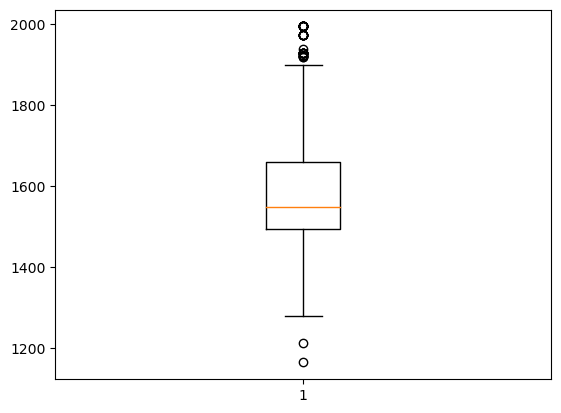

In [40]:
plt.boxplot(data['Height'])

In [41]:
data.reset_index(inplace=True)

In [42]:
data=data.drop('index',axis=1)

In [43]:
Q1=data.Height.quantile(0.25)
Q3=data.Height.quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

upper_index=np.where(data['Height']>=upper)[0]
lower_index=np.where(data['Height']<=lower)[0]

data.drop(index=upper_index,inplace=True)
data.drop(index=lower_index,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0dd7890>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0ee13d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7bec4f0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0ee2990>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0ee33d0>],
 'means': []}

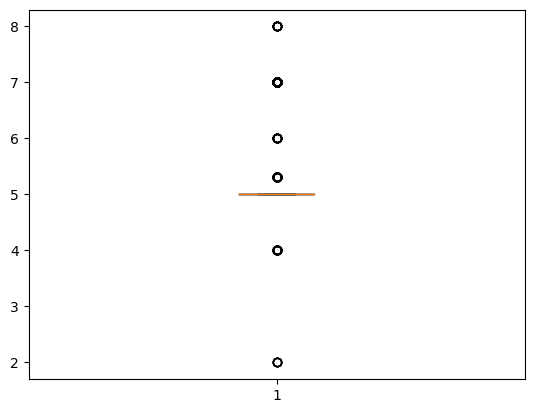

In [44]:
plt.boxplot(data['Seating Capacity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b7c0f446d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7c0f45e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7c0f3f950>],
 'medians': [<matplotlib.lines.Line2D at 0x1b7c0f47410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b7c0f44590>],
 'means': []}

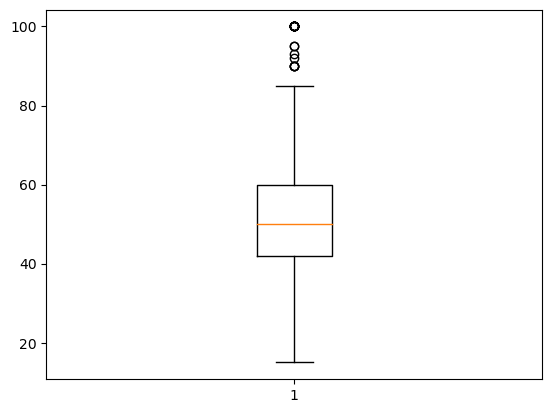

In [45]:
plt.boxplot(data['Fuel Tank Capacity'])

In [46]:
data.reset_index(inplace=True)

In [47]:
data=data.drop('index',axis=1)

In [48]:
Q1=data['Fuel Tank Capacity'].quantile(0.25)
Q3=data['Fuel Tank Capacity'].quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

upper_index=np.where(data['Fuel Tank Capacity']>=upper)[0]
lower_index=np.where(data['Fuel Tank Capacity']<=lower)[0]

data.drop(index=upper_index,inplace=True)
data.drop(index=lower_index,inplace=True)

In [49]:
data.reset_index(inplace=True)

In [50]:
data=data.drop('index',axis=1)

In [51]:
data.shape

(1772, 20)

In [52]:
correlation=data.corr()
correlation

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Make,1.000000,0.181838,-0.015470,0.059386,0.026307,-0.010786,0.093944,0.028467,0.011354,0.006720,-0.048179,0.086187,-0.029107,-0.007844,0.203618,-0.002762,-0.026665,0.190423,0.208140,0.036998
Model,0.181838,1.000000,-0.105256,-0.046515,0.055961,-0.056135,0.219042,-0.018523,0.035245,-0.011043,-0.028423,-0.019417,0.084062,0.010828,-0.248986,-0.234354,-0.105128,0.317725,0.089084,-0.083605
Price,-0.015470,-0.105256,1.000000,0.329765,-0.293144,-0.127892,-0.489021,-0.092345,-0.112813,0.064677,-0.097971,0.300454,-0.162277,0.393138,0.034396,0.599979,0.569090,0.060703,0.010388,0.559048
Year,0.059386,-0.046515,0.329765,1.000000,-0.568682,-0.008587,-0.164528,-0.059424,-0.061384,-0.276696,-0.036491,0.115683,-0.157049,0.070830,-0.017308,0.088125,0.206518,0.144335,0.009373,0.053952
Kilometer,0.026307,0.055961,-0.293144,-0.568682,1.000000,-0.288744,0.179111,0.002421,0.067615,0.191998,0.034171,-0.054279,0.040180,-0.009048,0.004654,0.038174,-0.018248,0.087912,0.184278,0.069502
Fuel Type,-0.010786,-0.056135,-0.127892,-0.008587,-0.288744,1.000000,0.063345,0.063038,-0.036138,-0.053180,-0.014933,-0.126939,0.107826,-0.402916,-0.020189,-0.304559,-0.352984,-0.318168,-0.288543,-0.404841
Transmission,0.093944,0.219042,-0.489021,-0.164528,0.179111,0.063345,1.000000,0.058040,0.129855,-0.076089,0.069607,-0.236985,0.311805,-0.307403,-0.001100,-0.501497,-0.481548,0.042612,-0.000086,-0.467208
Location,0.028467,-0.018523,-0.092345,-0.059424,0.002421,0.063038,0.058040,1.000000,-0.012467,-0.037280,-0.093461,-0.038805,0.090924,-0.070259,0.022145,-0.060167,-0.082577,-0.026558,0.005695,-0.089324
Color,0.011354,0.035245,-0.112813,-0.061384,0.067615,-0.036138,0.129855,-0.012467,1.000000,-0.009077,0.012436,-0.056800,0.083710,-0.034208,0.041587,-0.130574,-0.122522,-0.012409,0.009006,-0.086116
Owner,0.006720,-0.011043,0.064677,-0.276696,0.191998,-0.053180,-0.076089,-0.037280,-0.009077,1.000000,0.053863,0.036648,-0.004261,0.089412,-0.018837,0.091017,0.052992,-0.007985,0.024100,0.095345


### Train Test Split

In [53]:
x=data.drop('Price',axis=1)
y=data['Price']

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

### Linear Regression

In [55]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [56]:
model1.coef_

array([ 1.92045601e+03,  4.58654103e+02,  1.12482414e+05, -1.17256452e+01,
        1.01632675e+05, -2.69077876e+05, -3.63414049e+03, -2.65049359e+03,
        2.06170067e+05, -5.93344003e+05,  5.34265459e+03,  4.75526187e+03,
        4.81853498e+03,  6.48648270e+04,  2.45390283e+03,  3.02076897e+03,
       -1.09526067e+02, -4.90094347e+05,  1.91465255e+04])

In [57]:
model1.intercept_

-239922388.1541323

In [58]:
model1.score(x_train,y_train)

0.637980985041664

In [59]:
model1.score(x_test,y_test)

0.6012851955518377

In [60]:
y_pred=model1.predict(x_test)

In [61]:
pd.DataFrame({'True values':y_test,'Predicted values':y_pred})

,True values,Predicted values
1074,545000,5.213276e+05
326,275000,-1.338467e+06
274,195000,-1.630244e+05
1431,1399000,1.669695e+06
226,395000,6.113680e+05
...,...,...
595,2200000,2.213987e+06
1537,1450000,1.400302e+06
1571,475000,1.774435e+05
1224,1199000,1.460045e+06


In [62]:
mean_absolute_error(y_test,y_pred)

700065.4534949999

In [63]:
mean_squared_error(y_test,y_pred)

1246790131030.59

### Decision Tree Regressor

In [64]:
model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
model2.get_depth()

23

In [66]:
print('Test score:',model2.score(x_test,y_test))
print('Train score:',model2.score(x_train,y_train))
y_pred2=model2.predict(x_test)
print('Error:',mean_squared_error(y_test,y_pred2))

Test score: 0.8013097637630602
Train score: 0.9997601289472988
Error: 621308822518.4282


In [67]:
model3=DecisionTreeRegressor(max_depth=5)
model3.fit(x_train,y_train)
print('Test score:',model3.score(x_test,y_test))
print('Train score:',model3.score(x_train,y_train))
y_pred3=model3.predict(x_test)
print('Error:',mean_squared_error(y_test,y_pred3))

Test score: 0.7247906642105673
Train score: 0.88660121334913
Error: 860585762057.8


### Random Forest Regressor

In [68]:
model4 = RandomForestRegressor(random_state=10)
model4.fit(x_train,y_train)
print('train score:',model4.score(x_train,y_train))
print('test score:',model4.score(x_test,y_test))

train score: 0.9802454157164469
test score: 0.8798447050334902


In [69]:
model5 = RandomForestRegressor(n_estimators=50,random_state=1)
model5.fit(x_train,y_train)
print('train score:',model5.score(x_train,y_train))
print('test score:',model5.score(x_test,y_test))

train score: 0.9812934203518014
test score: 0.8757463016741461


### K Neigbours Regressor

In [70]:
model6=KNeighborsRegressor()
model6.fit(x_train,y_train)
print('Train score:',model6.score(x_train,y_train))
print('Test score:',model6.score(x_test,y_test))

Train score: 0.6199978204092708
Test score: 0.35698595850922155


In [71]:
model7=KNeighborsRegressor(n_neighbors=10)
model7.fit(x_train,y_train)
print('Train score:',model7.score(x_train,y_train))
print('Test score:',model7.score(x_test,y_test))

Train score: 0.4937123480771244
Test score: 0.29842317498351945


### Support Vectors Machine

In [72]:
model8 = SVR()
model8.fit(x_train,y_train)
print('Train score:',model8.score(x_train,y_train))
print('Test score:',model8.score(x_test,y_test))

Train score: -0.14027378318919825
Test score: -0.09966172325697498


### Boosting Algorithms

In [73]:
model9=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7),learning_rate=0.6)
model9.fit(x_train,y_train)

C:\Users\sreed\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7),
                  learning_rate=0.6)

In [74]:
model9.score(x_train,y_train)

0.9883636358754135

In [75]:
model9.score(x_test,y_test)

0.8947624505187929

In [76]:
model10=GradientBoostingRegressor(max_depth=6, learning_rate=0.6)
model10.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.6, max_depth=6)

In [77]:
model10.score(x_train,y_train)

0.9997547380391012

In [78]:
model10.score(x_test,y_test)

0.8873999570261866

In [79]:
model11=XGBRegressor()
model11.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
model11.score(x_train,y_train)

0.9994976533797738

In [81]:
model11.score(x_test,y_test)

0.9260162803334624

### Model Score Comparison

In [82]:
model=['Linear Regression','Decision Tree','Random Forest','KNN','SVM','Adaboost','Gradient Boosting','XGB']

In [83]:
score=[model1.score(x_test,y_test),model3.score(x_test,y_test),model4.score(x_test,y_test),model6.score(x_test,y_test),model8.score(x_test,y_test),model9.score(x_test,y_test),model10.score(x_test,y_test),model11.score(x_test,y_test)]

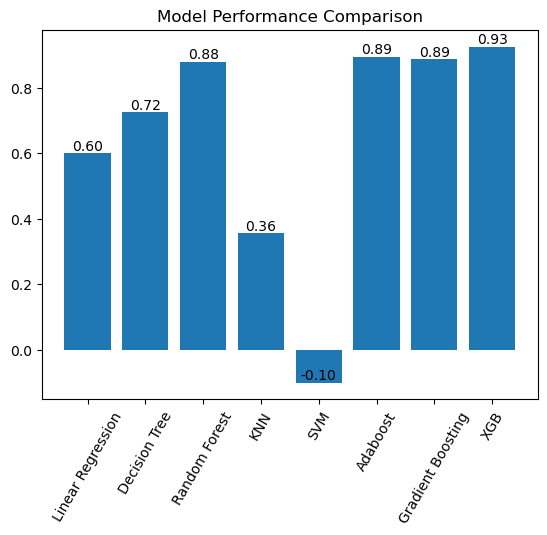

In [84]:
plt.bar(model,score)
plt.title('Model Performance Comparison')
plt.xticks(rotation=60)
for i,score in enumerate(score):
    plt.text(i,score,f'{score:.2f}',ha='center',va='bottom')

### Optimization

In [97]:
gscv = GridSearchCV(model11,{'n_estimators': [10,15,20,30,40,50,60,70,80,90,100],'learning_rate':[0.3,0.4,0.5,0.6,0.7],'max_depth':[4,5,6,7,8]},cv=5)

In [94]:
gscv.fit(x,y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'max_depth': [4, 5, 6, 7],
                         'n_estimators': [10, 15, 20, 30, 40, 50, 60, 70, 80,
                                          90, 100]})

In [95]:
gscv.best_params_

{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 80}

In [96]:
gscv.best_score_

0.871158690204137